In [ ]:
# Kmeans Clustering Assignment

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [65]:
# Upload Data
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [66]:
# Read Dataset
home_data = pd.read_csv('housing.csv')
home_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [67]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


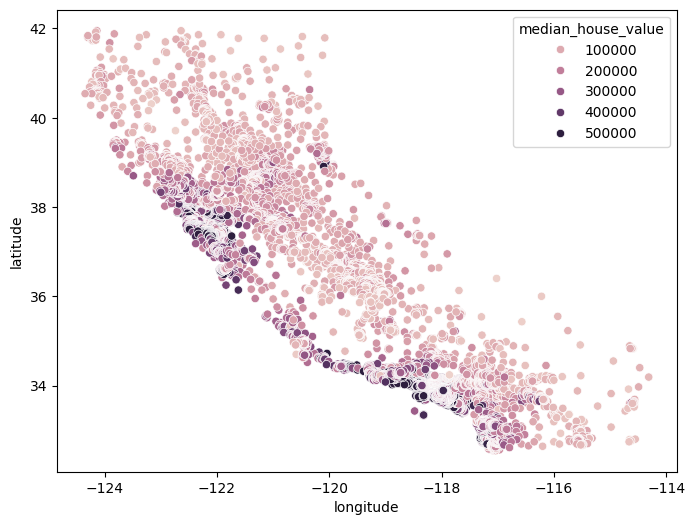

In [68]:
# Visualize the Data
plt.figure(figsize=(8, 6))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

In [69]:
# Normalizing The Data

# training and test splits
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

# normalize the training and test data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [70]:
# Fitting and Evaluating the Model
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

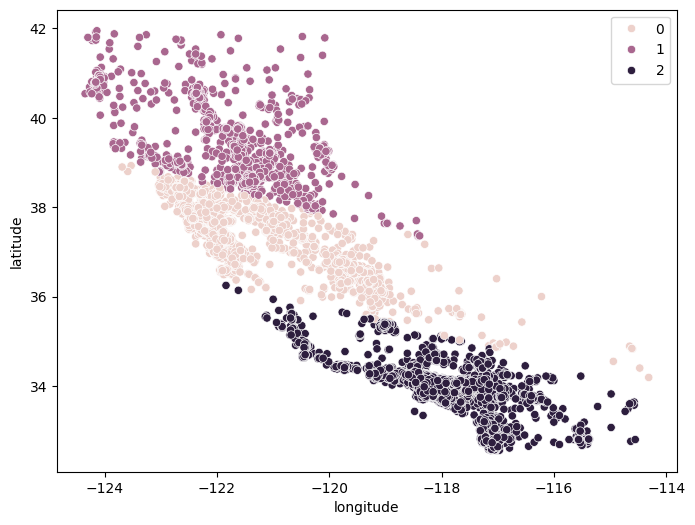

In [71]:
# visualize the data fit Model.
plt.figure(figsize=(8, 6))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

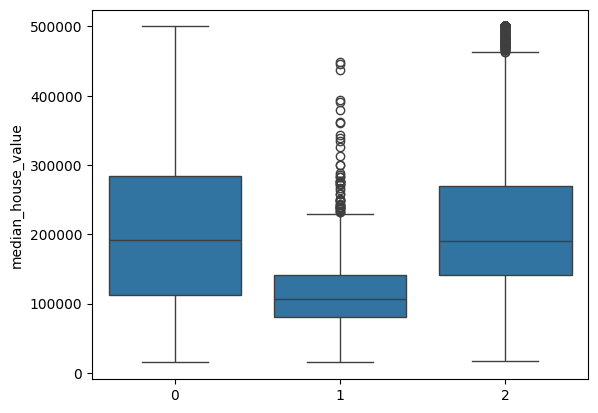

In [81]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])
plt.show()

In [72]:
# Evaluate performance of clustering algorithm using a Silhouette score
# where a lower score represents a better fit.

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

In [73]:
# Choosing the best number of clusters

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

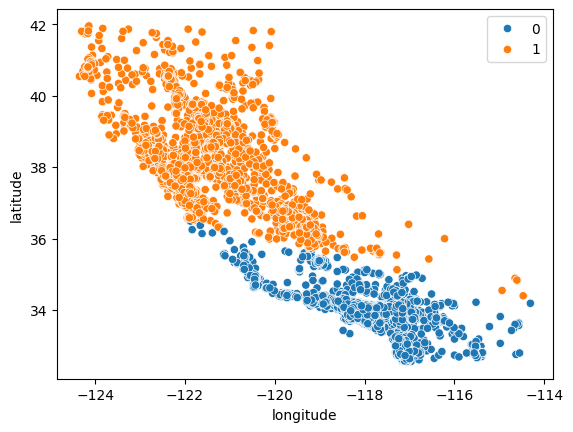

In [74]:
# manually view different values of k = 2
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)
plt.show()

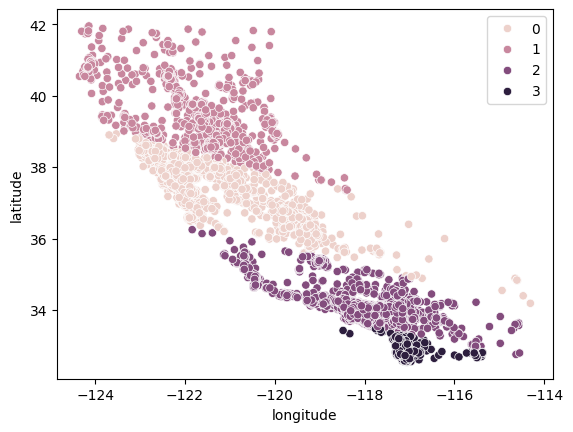

In [75]:
# manually view different values of k =4
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
plt.show()

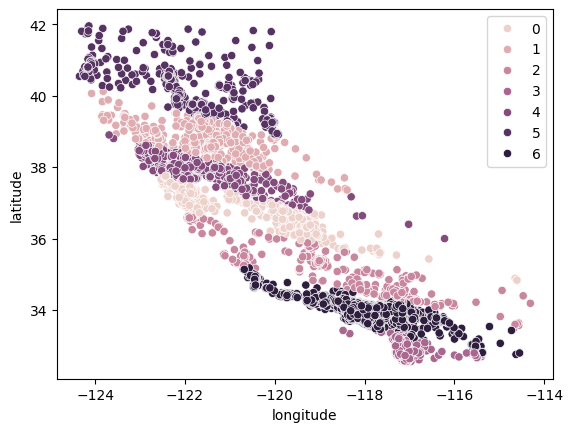

In [76]:
# manually view different values of k = 7
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)
plt.show()

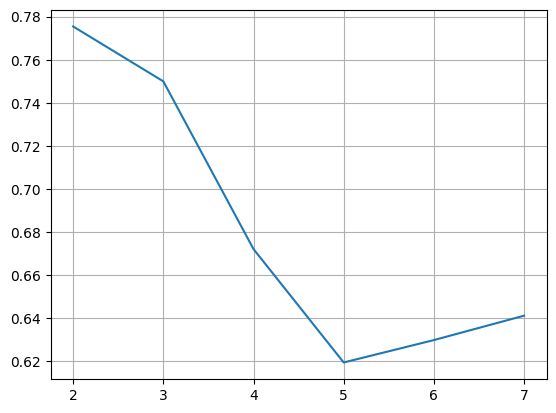

In [77]:
# view value of k by using an elbow plot
# where the y-axis is a measure of goodness of fit and the x-axis is the value of k

sns.lineplot(x = K, y = score)
plt.grid()
plt.show()

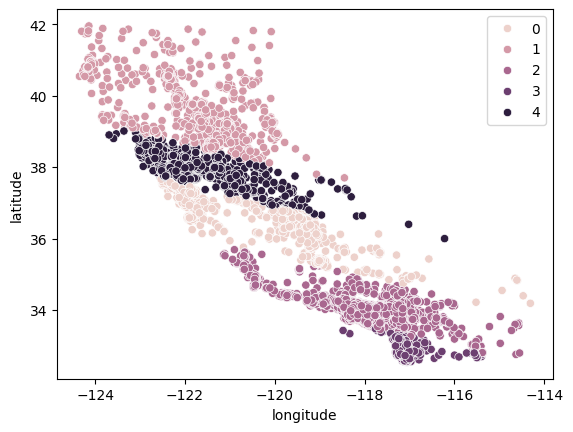

In [78]:
# from elbow plot, k = 5 is probably the best we can do without overfitting.

sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.show()

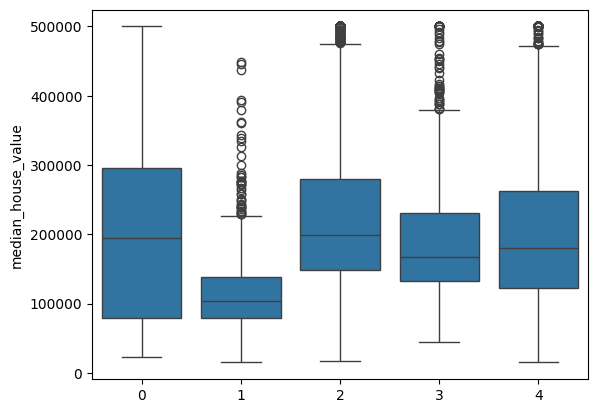

In [79]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.show()